In [1]:
# All imports should be in first cell
import cartopy
import imp
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline
import numpy as np
import ThinWalls
import GMesh

In [2]:
imp.reload(ThinWalls);

In [3]:
# Colormap for plots
cmap = plt.cm.seismic
norm = matplotlib.colors.BoundaryNorm(np.linspace(-.5,4.5,6),cmap.N)

# 2x2 target grid with 4x4 topographic data containing a test walls

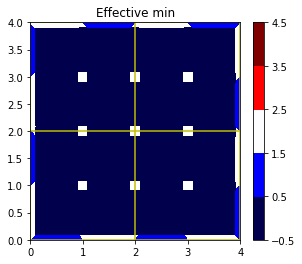

In [4]:
ni,nj = 4,4
FG = ThinWalls.ThinWalls(lon=np.linspace(0,ni,ni+1), lat=np.linspace(0,nj,nj+1))
FG.set_cell_mean( np.zeros((nj,ni)) )
FG.set_edge_mean(
    np.array(
[
    [2,0,0,0,1],
    [1,0,0,0,2],
    [2,0,0,0,1],
    [1,0,0,0,2]
]),
    np.array(
[
    [1,2,1,2],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [2,1,2,1]
])
)

FG.init_effective_values()

plt.figure(figsize=(16,4))
ax = plt.subplot(131); plt.colorbar(
    FG.plot(ax, norm=norm, cmap=cmap, measure='effective', metric='min'), ax=ax); plt.title('Effective min');
GMesh.GMesh(lon=np.linspace(0,ni,ni//2+1), lat=np.linspace(0,nj,nj//2+1)).plot(ax,linecolor='y') # Will be target grid

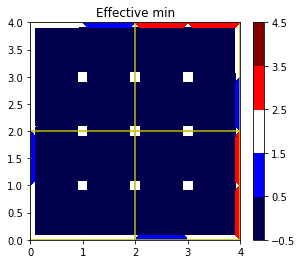

In [5]:
ns = np.array([
    [2,0],
    [0,3]
])
ew = np.array([
    [0,3],
    [2,0]
])


FG.limit_NS_EW_connections(ns, ew)

plt.figure(figsize=(16,4))
ax = plt.subplot(131); plt.colorbar(
    FG.plot(ax, norm=norm, cmap=cmap, measure='effective', metric='min'), ax=ax); plt.title('Effective min');
GMesh.GMesh(lon=np.linspace(0,ni,ni//2+1), lat=np.linspace(0,nj,nj//2+1)).plot(ax,linecolor='y') # Will be target grid

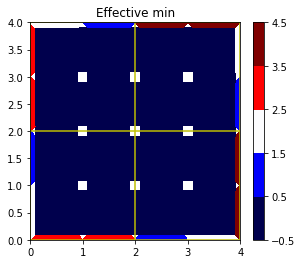

In [6]:
sw = np.array([
    [3,0],
    [0,0]
])
se = np.array([
    [0,4],
    [0,0]
])
nw = np.array([
    [0,0],
    [3,0]
])
ne = np.array([
    [0,0],
    [0,4]
])

FG.limit_corner_connections(sw, se, ne, nw)

plt.figure(figsize=(16,4))
ax = plt.subplot(131); plt.colorbar(
    FG.plot(ax, norm=norm, cmap=cmap, measure='effective', metric='min'), ax=ax); plt.title('Effective min');
GMesh.GMesh(lon=np.linspace(0,ni,ni//2+1), lat=np.linspace(0,nj,nj//2+1)).plot(ax,linecolor='y') # Will be target grid